In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from models.HH import *
from models.LIF import * 
from models.Ishikevich import *
from models.morrislecar import *
from utils.load import *
import matplotlib.animation as animation

In [29]:
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)


#### Results from Experiment 2a/configuration of the gap junction coupling
Here we want to see if the ML is symmetric and also to see what happens if we can make IZH symmetric


HH parameters

In [30]:
params_HH = load_HH()
k = 0.012 #strength of the gap junction coupling
Isyn = [ [0, 0.05] , [0, 0.05]] #delta peak of the chemical synapse
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2

#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

#time constants
dt = 0.01
t_final = 300

In [31]:
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

#data2aHH, completeHH = rk_simplemodel(dt,t_final,2,[V0,V0],[n0,n0],[m0,m0],[h0,h0],gna,gk,gl,Ena,Ek,El,C,I1,Isyn,k,tau)
data2aHH, completeHH_2a = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I1,Isyn,k,tau)
data2, completeHH_2a_2 = rk_simplemodel(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I2,Isyn,k,tau)

Integrate and fire parameters

In [32]:
params_LIF = load_LIF()
#Same as before
k = 0.012
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]

#filtering order
order = 2

#Initial conditions for the LIF
y0 = [-70, -70]

#Time conditions
t_final = 300
dt = 0.01 

In [33]:
data2aIF, completeIF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1)
data2b, complete_IF_2a = rk_if(dt,t_final,order,y0,*params_LIF,I2,Isyn,k,tau,1)

Izhikevich Parameters

In [34]:
params_IZH = load_ISH()

k_izh = 0.04
dt = 0.01
t_final = 300
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5
order = 2
y0 = [-70,-70]
u0 = [0.0,0.0]


data2Ish, completeIsh1 = rk_ish(dt,t_final,order,y0,u0,I1,Is,*params_IZH,k_izh,tau)
data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau)

Morris-Lecar

In [35]:
params_ML = load_ML()

k_ML = 0.008
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]
Isyn = np.array(Isyn)

#filtering order
order = 2

#Initial conditions for the ML
y0 = [ -71.7061740390072, -71.7061740390072]
w0 = [0.0007223855976593603, 0.0007223855976593603]

#Time conditions
t_final = 300
dt = 0.01 


In [36]:
#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))


for i in range(4999,15000):
    I1[i,0] = 0.5 #changes the amplitude
    I2[i,0] = -0.5

data2aML, completeML = rk_ml(dt,t_final,2,y0,w0,*params_ML,I1,Isyn,k_ML,tau)
data2ML, completeML2 = rk_ml(dt,t_final,2,y0,w0,*params_ML,I2,Isyn,k_ML,tau)

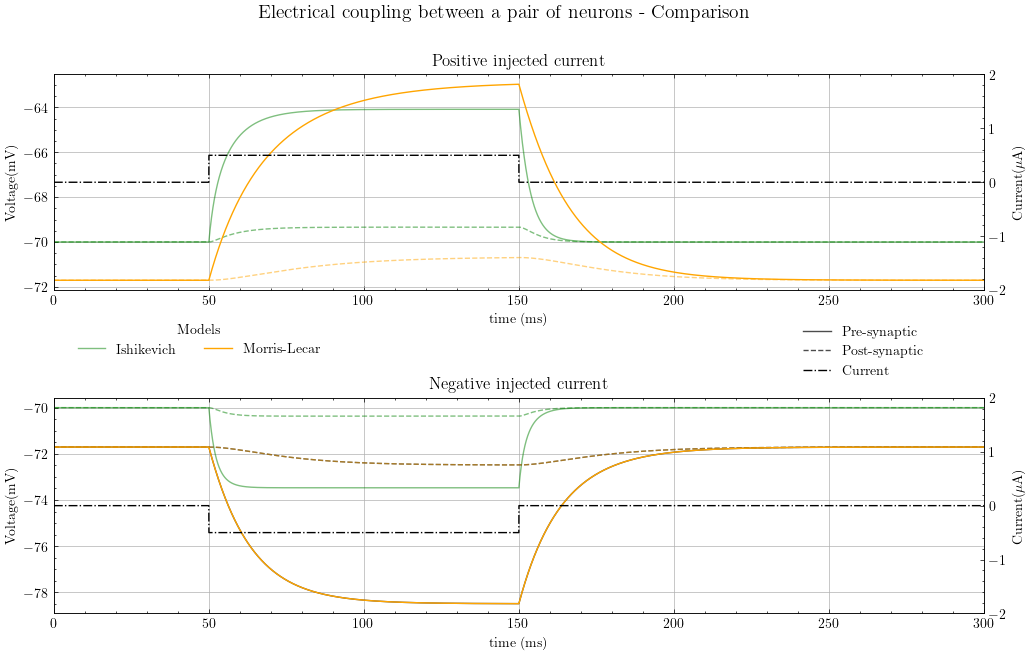

In [39]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax4 = ax2.twinx() 
ax1.title.set_text('Positive injected current')
ax2.title.set_text('Negative injected current')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)
ax4.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of neurons - Comparison',fontsize=14)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
#lns1 = ax1.plot(time,data2aIF[:,0], label = 'LIF', color = 'b')
#lns2 = ax1.plot(time,data2aHH[:,0], label = 'HH', color = 'r' )
#lns3 = ax1.plot(time,data2aIF[:,1], 'b--', alpha = 0.5)
#lns4 = ax1.plot(time,data2aHH[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data2Ish[:,0], label = 'Ishikevich', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data2Ish[:,1], 'g--', alpha = 0.5)
lns7 = ax1.plot(time,data2aML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax1.plot(time,data2aML[:,1], '--',color = 'orange', alpha = 0.5)
lnsc = ax3.plot(time,I1[:,0],'-.', color = 'black')

#lns1 = ax2.plot(time,data2b[:,0], label = 'LIF', color = 'b')
#lns2 = ax2.plot(time,data2[:,0], label = 'HH', color = 'r')
#lns3 = ax2.plot(time,data2b[:,1],'b--', alpha = 0.5)
#lns4 = ax2.plot(time,data2[:,1], 'r--', alpha = 0.5)
lns5 = ax2.plot(time,data2ish[:,0], label = 'Izhikevich', color = 'g', alpha = 0.5)
lns6 = ax2.plot(time,data2ish[:,1], 'g--', alpha = 0.5)
lnsp = ax2.plot(time,data2ML[:,0], label = 'Pre-synaptic', alpha=0.7,color = 'black')
lnss = ax2.plot(time,data2ML[:,1], '--',color = 'black', alpha = 0.7, label = 'Post-synaptic')
lns7 = ax2.plot(time,data2ML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax2.plot(time,data2ML[:,1], '--',color = 'orange', alpha = 0.5)

lnsc = ax4.plot(time,I2[:,0],'-.', label= 'Current',color = 'black')

#ax1.set_ylim(-71.71,-71.71)
#ax1.set_xlim(2950,3000)

#ax2.set_ylim(-71.707,-71.704)
#ax2.set_xlim(2950,3000)
lns = lnsp + lnss + lnsc
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))

ax1.grid()
ax2.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

Morris-Lecar model is not symmetrical

In [11]:
El = -70
variationHHgj = np.zeros((len(data2aHH[:,0]),1))
deltav1 = np.array(abs(El-data2aHH[:,0]))
deltav2 = np.array(abs(El-data2aHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(data2aIF[:,0]), 1))
deltav1 = np.array(abs(El - data2aIF[:,0]))
deltav2 = np.array(abs(El - data2aIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2Ish[:,0]))
deltav2 = np.array(abs(El - data2Ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2ish[:,0]))
deltav2 = np.array(abs(El - data2ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2aML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2aML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2ML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2ML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


/tmp/ipykernel_6650/3862380659.py:5: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6650/3862380659.py:11: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6650/3862380659.py:17: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_6650/3862380659.py:23: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


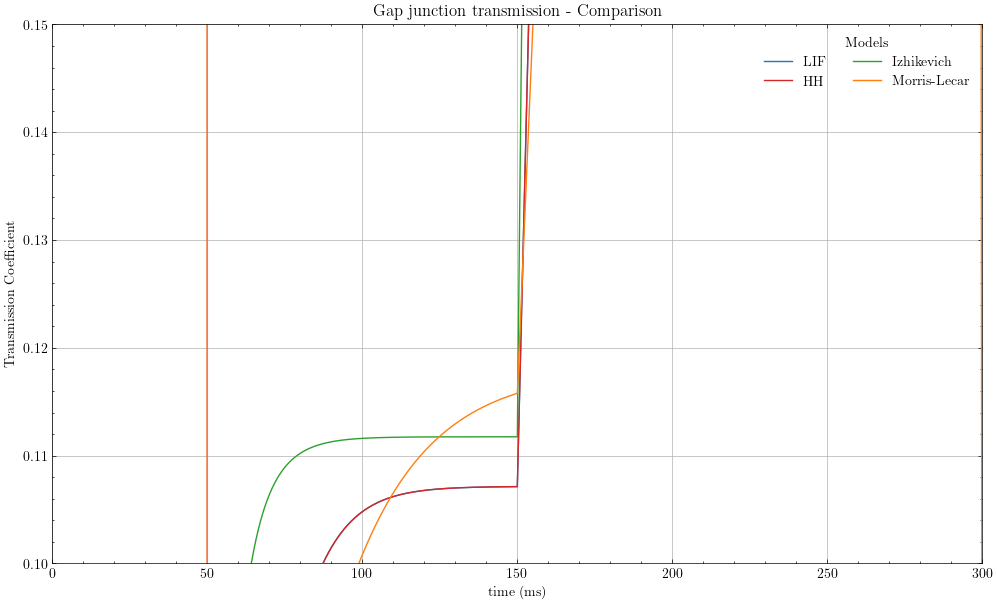

In [25]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(0,300)
plt.ylim(0.1,0.15)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)
plt.grid()

In [20]:
def phases(data,dt):
    points1 = np.zeros(len(data[:,0]))
    points2 = np.zeros(len(data[:,1]))
    num_points1 = 0
    num_points2 = 0
    for i in range(1,len(data)-2):
        if  (data[i-1,0] < data[i,0] and data[i,0] > data[i+1,0] ) or (data[i-1,0] > data[i,0] and data[i,0] < data[i+1,0]):
            points1[num_points1] = i * dt
            num_points1 = num_points1 +1
        if  (data[i-1,1] < data[i,1] and data[i,1] > data[i+1,1] ) or (data[i-1,1] > data[i,1] and data[i,1] < data[i+1,1]):
            points2[num_points2] = i * dt
            num_points2 = num_points2 +1
        if points1[num_points1] > points2[num_points2]:
            points2[num_points2] = 0
            num_points2 = num_points2 -1
    time_dif = 0
    if len(points1) != len(points2):
        print('error')
    for i in range(0,num_points1-1):
        time_dif = time_dif + (points1[i] - points2[i])
    time_dif = time_dif/num_points1
    return abs(time_dif),float(points1[i])

In [ ]:
params_HH = load_HH()
params_LIF = load_LIF()
params_IZH = load_ISH()
params_ML = load_ML()

k = 0.012
k_izh = 0.04
k_ML = 0.008

Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

y0 = [-70,-70]
u0 = [0.0,0.0]

w0 = [0.0007223855976593603, 0.0007223855976593603]


#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

order = 2

HH model

In [27]:
t_final = 4000
dt = 0.01
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0


data_HH_total_1 = np.zeros((len(f),len(t)))
data_HH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 0.4 + 0.35*np.sin(2 * np.pi * f[i] * t)
    data4b_HH, completeHH_4b = rk_simplemodel(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    data_HH_total_1[i] = data4b_HH[:,0]
    data_HH_total_2[i] = data4b_HH[:,1]

    end = len(data4b_HH)
    if i < 9:
        mean[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )
        #print(np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]), np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]))
        time_diff, residue = phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

    else:
        mean[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )
        time_diff, residue = phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

f = 1000*f 
mean_HH_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100

fHH = f
meanHH = mean 
phasesHH = phases_test

LIF model

In [28]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
y0 = [-70,-70]
residue = 0

data_IF_total_1 = np.zeros((len(f),len(t)))
data_IF_total_2 = np.zeros((len(f),len(t)))

for i in range(0,len(f)):
    I[:,0] = 0.4+ 0.35*np.sin(2 * np.pi * f[i] * t)
    data4b_IF, complete_IF_4b = rk_if(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    data_IF_total_1[i] = data4b_IF[:,0]
    data_IF_total_2[i] = data4b_IF[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )
        time_diff, residue = phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )
        time_diff, residue = phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

f = 1000*f 
mean_IF_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]

mean[0] = 100
fIF= f 
meanIF = mean 
phasesIF = phases_test

Ishikevich model

In [29]:

t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))
residue = 0

data_IZH_total_1 = np.zeros((len(f),len(t)))
data_IZH_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)
    #data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,C,I,Is,vr,vt,k_ish,a,b,c,d,k_2,tau,vpeak)
    data4b_Ish, complete_Ish_4b = rk_ish(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    data_IZH_total_1[i] = data4b_Ish[:,0]
    data_IZH_total_2[i] = data4b_Ish[:,1]

    if i < 9:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_Ish[10000:end-1,1]) - np.min(data4b_Ish[10000:end-1,1]) ) / ( np.max(data4b_Ish[10000:end-1,0]) - np.min(data4b_Ish[10000:end-1,0]) )
        time_diff, residue  = phases(data4b_Ish[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
f = 1000*f 
mean_IZH_og = mean
mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]
    #print(mean[0],mean[i])

mean[0] = 100

fISH = f
meanISH = mean 
phasesISH= phases_test

Morris-Lecar model

In [30]:
t_final = 4000
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
f = np.append(f,0.15)
f = np.append(f,0.2)
f = np.append(f,0.25)
f = np.append(f,0.3)
f = np.append(f,0.35)
f = np.append(f, 0.4)
f = np.append(f, 0.45)
f = np.append(f, 0.5)
f = np.append(f, 0.55)
f = np.append(f, 0.6)
f = np.append(f, 0.65)
f = np.append(f, 0.7)
f = np.append(f, 0.75)
f = np.append(f, 0.8)
f = np.append(f, 0.85)
f = np.append(f, 0.9)
mean = np.zeros((len(f),1))
residue = 0
phases_test = np.zeros((len(f),1))

data_ML_total_1 = np.zeros((len(f),len(t)))
data_ML_total_2 = np.zeros((len(f),len(t)))


for i in range(0,len(f)):
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)
    data4b_ML, complete_ML_4b = rk_ml(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    data_ML_total_1[i] = data4b_ML[:,0]
    data_ML_total_2[i] = data4b_ML[:,1]
    if i < 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    elif i == 9:
        mean[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )
        time_diff, residue = phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        mean[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )
        time_diff, residue = phases(data4b_ML[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
f = 1000*f 
mean_ML_og = mean

mean = mean * 100 
for i in range(1,len(f)):
    mean[i] = mean[i] * 100 / mean[0]


mean[0] = 100
fML= f 
meanML = mean 
phasesML= phases_test

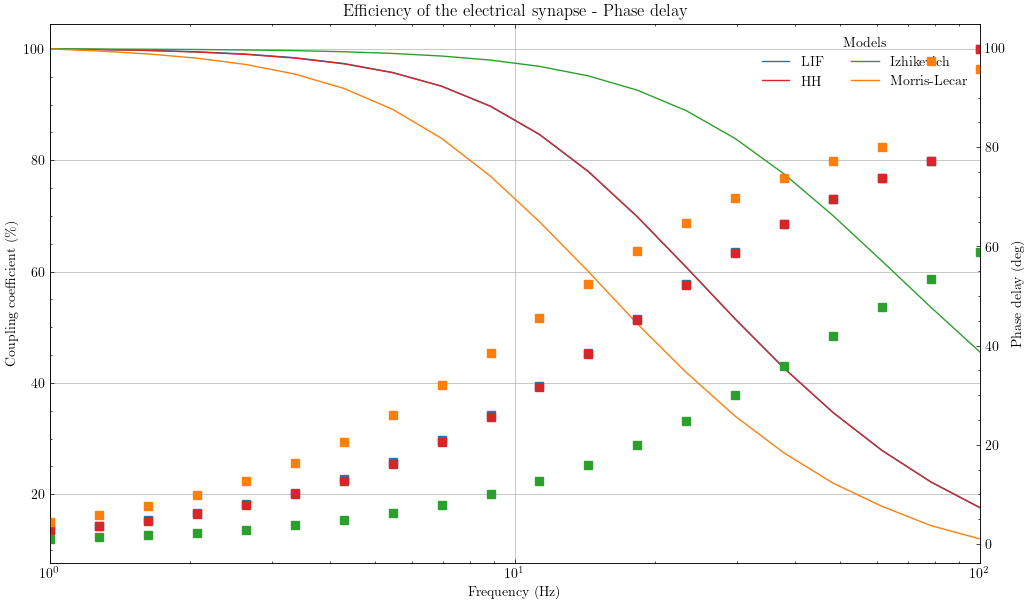

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,900)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,meanIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,meanHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, meanISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,meanML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')
ax1.grid()